<a href="https://colab.research.google.com/github/MoonlightO2/Movie-Analysis-Recommendation/blob/main/Netflix_Movie_Analysis_%26_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Movie Analysis & Recommendation**
***Datasets***: https://www.kaggle.com/datasets/shivamb/netflix-shows

### **1. Data Preprocessing**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
# Load the data
data_path = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Movies & TV/Netflix.csv'

In [ ]:
netflix_data = pd.read_csv(data_path)
print('Shape: ', netflix_data.shape, '\n')
print('Columns: ', netflix_data.columns.tolist(), '\n')
netflix_data.head()

Shape:  (8807, 12) 

Columns:  ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'] 



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Mapping dictionary for column renaming
column_mapping = {
    'show_id': 'Show ID',
    'type': 'Type',
    'title': 'Title',
    'director': 'Director',
    'cast': 'Cast',
    'country': 'Country',
    'date_added': 'Date Added',
    'release_year': 'Year Released',
    'rating': 'Rating',
    'duration': 'Duration',
    'listed_in': 'Listed in',
    'description': 'Description'
}

# Rename columns using the mapping dictionary
netflix_data.rename(columns=column_mapping, inplace=True)

# Display the modified DataFrame
netflix_data.head()

,Show ID,Type,Title,Director,Cast,Country,Date Added,Year Released,Rating,Duration,Listed in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print(netflix_data.columns.tolist())

['Show ID', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date Added', 'Year Released', 'Rating', 'Duration', 'Listed in', 'Description']


In [ ]:
columns_to_check = ['Show ID', 'Type', 'Title', 'Director', 'Date Added', 'Year Released', 'Rating']

for column in columns_to_check:
    unique_values = netflix_data[column].unique()
    count_unique_values = netflix_data[column].nunique()

    print(f"Column: {column}")
    print(f"Count of Unique Values: {count_unique_values}")
    print(f"Unique Values: {unique_values}")
    print("\n")

Column: Show ID
Count of Unique Values: 8807
Unique Values: ['s1' 's2' 's3' ... 's8805' 's8806' 's8807']


Column: Type
Count of Unique Values: 2
Unique Values: ['Movie' 'TV Show']


Column: Title
Count of Unique Values: 8807
Unique Values: ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']


Column: Director
Count of Unique Values: 4528
Unique Values: ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']


Column: Date Added
Count of Unique Values: 1767
Unique Values: ['September 25, 2021' 'September 24, 2021' 'September 23, 2021' ...
 'December 6, 2018' 'March 9, 2016' 'January 11, 2020']


Column: Year Released
Count of Unique Values: 74
Unique Values: [2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1

In [ ]:
# Explore the data - Basic statistics
netflix_data.describe()

,Year Released
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# Check for missing values and show only columns with null values
null_columns = netflix_data.columns[netflix_data.isnull().any()]
netflix_data[null_columns].isnull().sum()

Director      2634
Cast           825
Country        831
Date Added      10
Rating           4
Duration         3
dtype: int64

In [ ]:
print('Columns: ', netflix_data.columns.tolist(), '\n')

Columns:  ['Show ID', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date Added', 'Year Released', 'Rating', 'Duration', 'Listed in', 'Description'] 



In [ ]:
missing_data = ['Director', 'Cast', 'Country', 'Date Added', 'Rating', 'Duration']

# Fill missing values with the mode for categorical columns
for column in missing_data:
    netflix_data[column].fillna(netflix_data[column].mode()[0], inplace=True)

In [ ]:
# Check for missing values and show only columns with null values
null_columns = netflix_data.columns[netflix_data.isnull().any()]
null_values = netflix_data[null_columns].isnull().sum()

if null_values.empty:
    print("No null values found in the specified columns.")
else:
    print("Null values found in the following columns:")
    print(null_values)

No null values found in the specified columns.


### **2. Data Analysis**

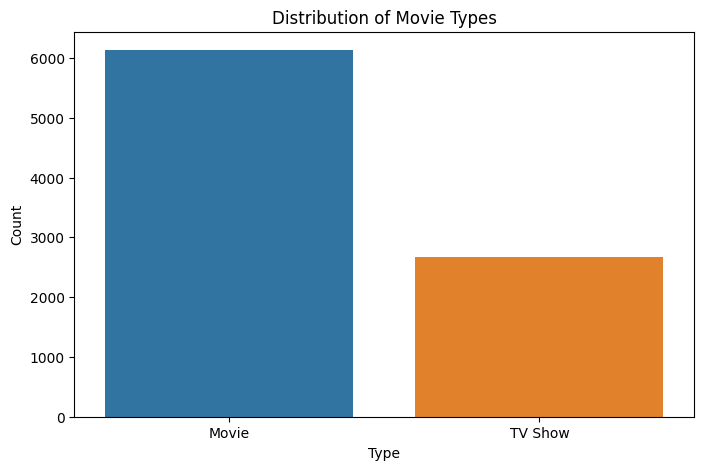

In [ ]:
# Plotting the distribution of movie types (TV Show vs. Movie)
plt.figure(figsize=(8, 5))
sns.countplot(x='Type', data=netflix_data)
plt.title('Distribution of Movie Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

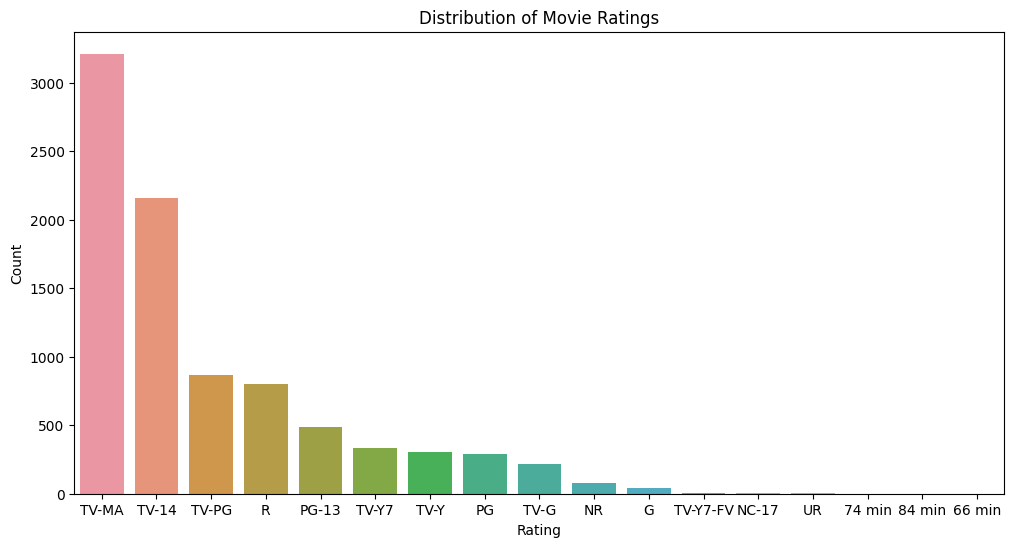

In [ ]:
# Plotting the distribution of movie ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='Rating', data=netflix_data, order=netflix_data['Rating'].value_counts().index)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

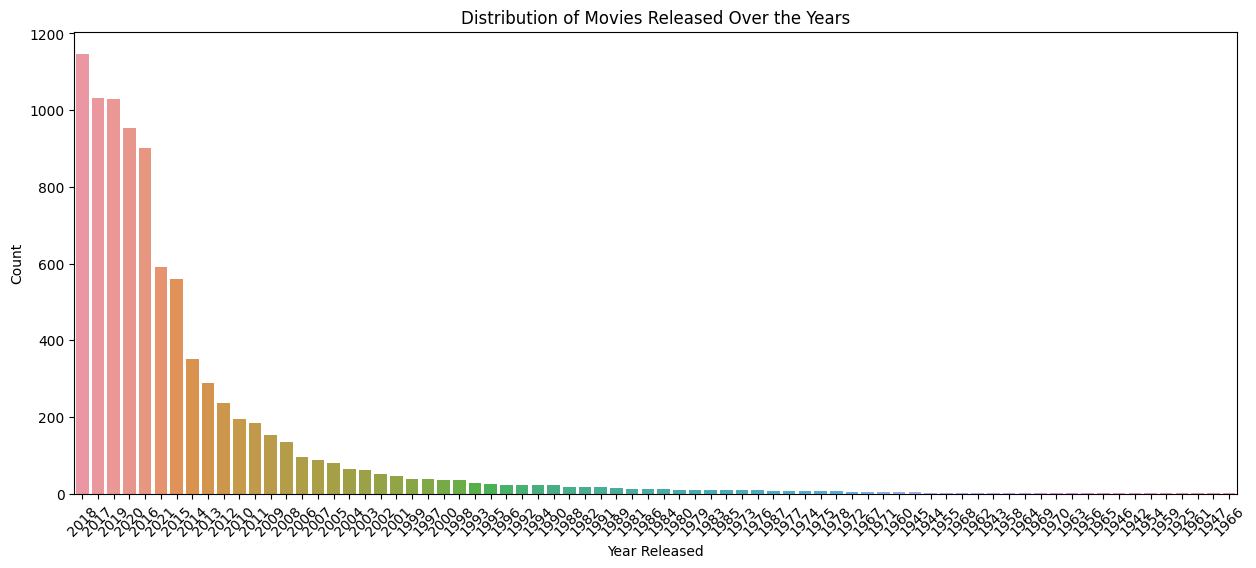

In [ ]:
# Plotting the distribution of movies released over the years
plt.figure(figsize=(15, 6))
sns.countplot(x='Year Released', data=netflix_data, order=netflix_data['Year Released'].value_counts().index)
plt.title('Distribution of Movies Released Over the Years')
plt.xlabel('Year Released')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

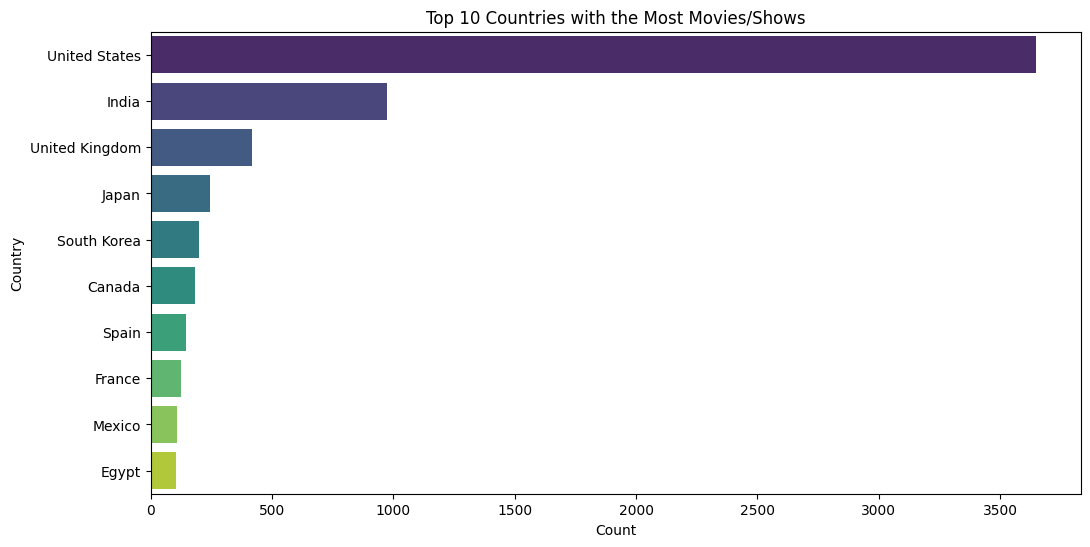

In [ ]:
# Plotting the top 10 countries with the most movies/shows
top_countries = netflix_data['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with the Most Movies/Shows')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### **3. Movie Recommendation**

In [ ]:
# Drop rows with missing values in important columns
netflix_data = netflix_data.dropna(subset=['Title', 'Director', 'Cast', 'Country', 'Description'])

# Combine relevant text columns to create a 'combined_features' column
netflix_data['Features'] = netflix_data['Title'] + ' ' + netflix_data['Director'] + ' ' + netflix_data['Cast'] + ' ' + netflix_data['Country'] + ' ' + netflix_data['Description']

In [ ]:
# Use TF-IDF Vectorizer to convert text data into vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_data['Features'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
# Function to get movie recommendations based on cosine similarity
def get_recommendations(title):
    try:
        idx = netflix_data.index[netflix_data['Title'] == title].tolist()[0]
    except IndexError:
        print(f"No recommendations found for movies similar to '{title}'.")
        return None

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 similar movies

    movie_indices = [i[0] for i in sim_scores]
    return netflix_data['Title'].iloc[movie_indices]

In [ ]:
user_input_movie_title = input("Movie Title: ")
recommendations = get_recommendations(user_input_movie_title)

if recommendations is not None:
    print(f"\nSimilar recommended movies for '{user_input_movie_title}':")
    for i, movie_title in enumerate(recommendations, start=1):
        print(f"{i}. {movie_title}")

Movie Title: Blood & Water

Similar recommended movies for 'Blood & Water':
1. Diamond City
2. Kings of Jo'Burg
3. Shirkers
4. Kalushi: The Story of Solomon Mahlangu
5. Lady in the Water
6. Cold Harbour
7. Frank and Cindy
8. Invictus
9. The Future of Water
10. Williams
